<a href="https://colab.research.google.com/github/Sushmitha-Katti/Artshaala--Frontend/blob/master/Session%207%20-%20In-Depth%20Coding%20Practice/Drill5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [74]:
# To reload the disk files
%load_ext autoreload
%autoreload 2

from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [96]:
# Train Phase transformations
train_transforms = transforms.Compose([

                                        transforms.RandomRotation((-7.0, 7.0), fill=(0,)),

                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])


# Dataset and Creating Train/Test Split

In [97]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

# Dataloader Arguments & Test/Train Dataloaders


In [98]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


Traceback (most recent call last):
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 239, in _feed
    reader_close()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 177, in close
    self._close()
  File "/usr/lib/python3.10/multiprocessing/connection.py", line 361, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor


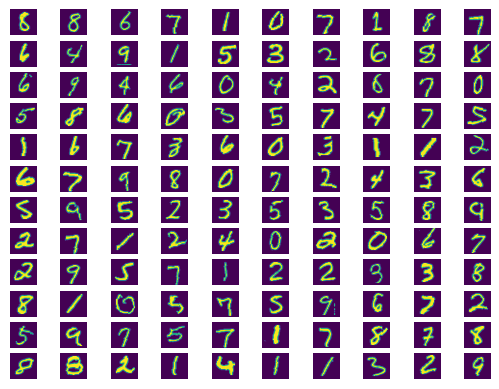

In [99]:
from utils import plot_images
dataiter = iter(train_loader)
images, labels = next(dataiter)
plot_images(120, images)

# Model Params


In [100]:
from models.model5 import Model5
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Model5().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
         Dropout2d-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             720
              ReLU-6           [-1, 10, 24, 24]               0
       BatchNorm2d-7           [-1, 10, 24, 24]              20
         Dropout2d-8           [-1, 10, 24, 24]               0
         MaxPool2d-9           [-1, 10, 12, 12]               0
           Conv2d-10           [-1, 12, 10, 10]           1,080
             ReLU-11           [-1, 12, 10, 10]               0
      BatchNorm2d-12           [-1, 12, 10, 10]              24

# Model Training and Testing

In [101]:

from train_test import TrainTest
train_test_instance = TrainTest()

model =  Model5().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch + 1)
    train_test_instance.train(model, device, train_loader, optimizer, epoch)
    train_test_instance.test(model, device, test_loader)

EPOCH: 1


Loss=0.14411227405071259 Batch_id=468 Accuracy=86.56: 100%|██████████| 469/469 [00:26<00:00, 17.71it/s]



Test set: Average loss: 0.0875, Accuracy: 9762/10000 (97.62%)

EPOCH: 2


Loss=0.06433116644620895 Batch_id=468 Accuracy=97.39: 100%|██████████| 469/469 [00:23<00:00, 20.01it/s]



Test set: Average loss: 0.0418, Accuracy: 9887/10000 (98.87%)

EPOCH: 3


Loss=0.14922572672367096 Batch_id=468 Accuracy=98.03: 100%|██████████| 469/469 [00:21<00:00, 22.09it/s]



Test set: Average loss: 0.0328, Accuracy: 9902/10000 (99.02%)

EPOCH: 4


Loss=0.09662414342164993 Batch_id=468 Accuracy=98.37: 100%|██████████| 469/469 [00:21<00:00, 22.22it/s]



Test set: Average loss: 0.0324, Accuracy: 9897/10000 (98.97%)

EPOCH: 5


Loss=0.019382743164896965 Batch_id=468 Accuracy=98.51: 100%|██████████| 469/469 [00:23<00:00, 20.06it/s]



Test set: Average loss: 0.0287, Accuracy: 9907/10000 (99.07%)

EPOCH: 6


Loss=0.08491700887680054 Batch_id=468 Accuracy=98.60: 100%|██████████| 469/469 [00:22<00:00, 20.53it/s]



Test set: Average loss: 0.0250, Accuracy: 9925/10000 (99.25%)

EPOCH: 7


Loss=0.09753771871328354 Batch_id=468 Accuracy=98.69: 100%|██████████| 469/469 [00:22<00:00, 20.80it/s]



Test set: Average loss: 0.0237, Accuracy: 9917/10000 (99.17%)

EPOCH: 8


Loss=0.06987633556127548 Batch_id=468 Accuracy=98.84: 100%|██████████| 469/469 [00:22<00:00, 21.27it/s]



Test set: Average loss: 0.0248, Accuracy: 9926/10000 (99.26%)

EPOCH: 9


Loss=0.03866322338581085 Batch_id=468 Accuracy=98.83: 100%|██████████| 469/469 [00:21<00:00, 22.23it/s]



Test set: Average loss: 0.0204, Accuracy: 9936/10000 (99.36%)

EPOCH: 10


Loss=0.014556911773979664 Batch_id=468 Accuracy=98.90: 100%|██████████| 469/469 [00:24<00:00, 19.47it/s]



Test set: Average loss: 0.0204, Accuracy: 9938/10000 (99.38%)

EPOCH: 11


Loss=0.07055865973234177 Batch_id=468 Accuracy=98.94: 100%|██████████| 469/469 [00:21<00:00, 21.94it/s]



Test set: Average loss: 0.0195, Accuracy: 9936/10000 (99.36%)

EPOCH: 12


Loss=0.02390342950820923 Batch_id=468 Accuracy=98.97: 100%|██████████| 469/469 [00:22<00:00, 21.09it/s]



Test set: Average loss: 0.0193, Accuracy: 9942/10000 (99.42%)

EPOCH: 13


Loss=0.03312789276242256 Batch_id=468 Accuracy=98.95: 100%|██████████| 469/469 [00:22<00:00, 21.30it/s]



Test set: Average loss: 0.0199, Accuracy: 9937/10000 (99.37%)

EPOCH: 14


Loss=0.033571090549230576 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:23<00:00, 19.75it/s]



Test set: Average loss: 0.0173, Accuracy: 9946/10000 (99.46%)

EPOCH: 15


Loss=0.021732620894908905 Batch_id=468 Accuracy=99.05: 100%|██████████| 469/469 [00:20<00:00, 22.79it/s]



Test set: Average loss: 0.0199, Accuracy: 9933/10000 (99.33%)



# Loss and Accuaracy

Text(0.5, 1.0, 'Test Accuracy')

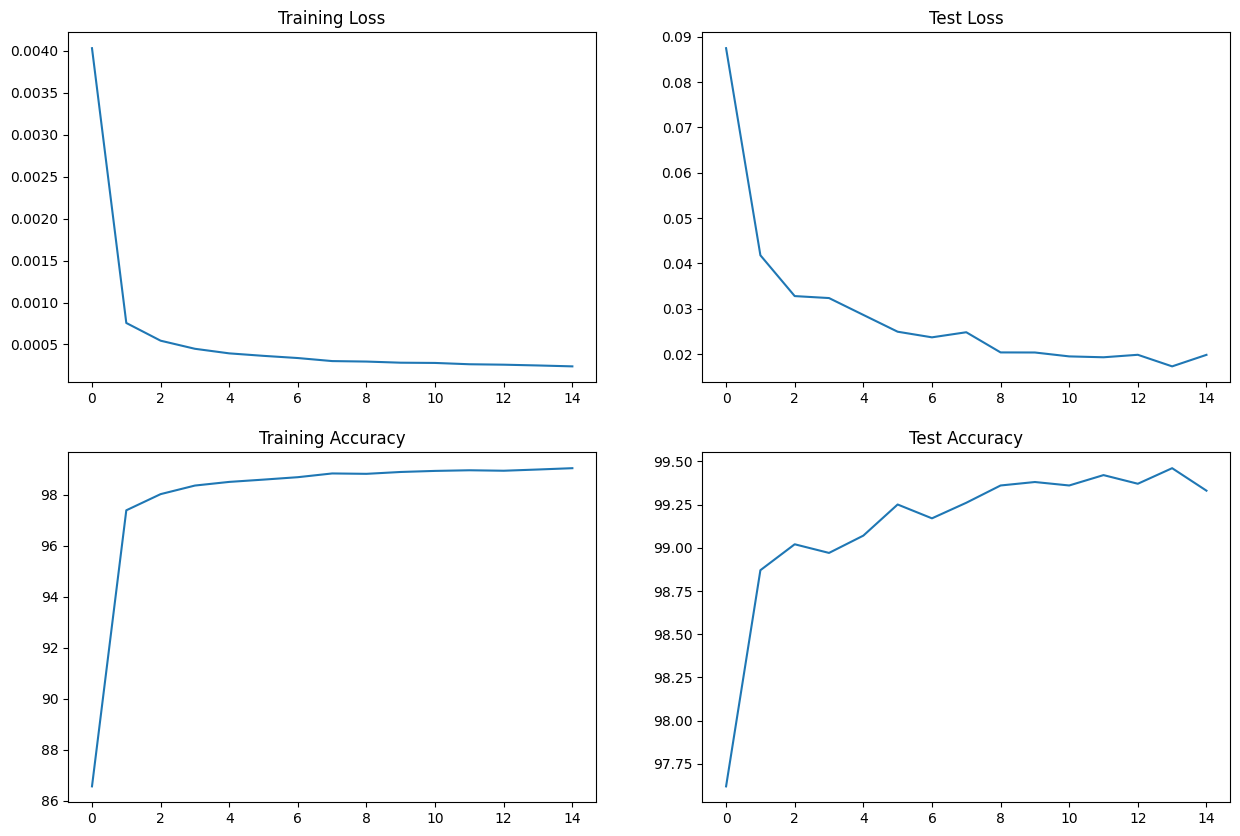

In [102]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_test_instance.train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_test_instance.train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(train_test_instance.test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(train_test_instance.test_acc)
axs[1, 1].set_title("Test Accuracy")